In [20]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0.0
5,1.0,0.0,7.0,5.0,0.0,6.0,6.0,0.0
6,4.0,0.0,9.0,3.0,0.0,7.0,7.0,0.0
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,0.0
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,0.0
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,1.0
2898,11.0,1.0,1.0,3.0,1.0,2.0,0.0,1.0


In [21]:
df.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.835904,-0.717585,-0.733913,0.834174,-0.698716,-0.709264,0.698668
Stage_fear,0.835904,1.000000,-0.820761,-0.846110,0.949544,-0.798804,-0.811519,0.825953
Social_event_attendance,-0.717585,-0.820761,1.000000,0.719483,-0.819694,0.706114,0.710030,-0.697706
Going_outside,-0.733913,-0.846110,0.719483,1.000000,-0.843597,0.707923,0.741060,-0.714027
Drained_after_socializing,0.834174,0.949544,-0.819694,-0.843597,1.000000,-0.794008,-0.808464,0.824296
Friends_circle_size,-0.698716,-0.798804,0.706114,0.707923,-0.794008,1.000000,0.672576,-0.662212
Post_frequency,-0.709264,-0.811519,0.710030,0.741060,-0.808464,0.672576,1.000000,-0.694253
Personality,0.698668,0.825953,-0.697706,-0.714027,0.824296,-0.662212,-0.694253,1.000000


# according to correlation test below columns are having impact to the data

In [23]:
continuous = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
categories= ['Stage_fear','Drained_after_socializing','Personality']

In [24]:
from scipy import stats

In [25]:
#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [26]:
two_sample(df["Time_spent_Alone"],df["Post_frequency"])

True

In [27]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [28]:
chisquare_cat_vs_cat(df["Drained_after_socializing"],df["Personality"])

True

In [29]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [30]:
annova_test("Drained_after_socializing","Post_frequency")

False

In [31]:
final = {}
# Exclude datetime columns from the list of columns to iterate through
cols_to_analyze = [col for col in df.columns if col not in ['Drained_after_socializing', 'Personality']]

for i in cols_to_analyze:
    final[i]={}
    for j in cols_to_analyze:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else:
            # If the columns are of mixed types not covered by the above or one is a date, skip the test
            continue

        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [32]:
import pprint

In [33]:
pprint.pprint(final)

{'Friends_circle_size': {'Friends_circle_size': 1,
                         'Going_outside': 0,
                         'Post_frequency': 0,
                         'Social_event_attendance': 0,
                         'Stage_fear': 0,
                         'Time_spent_Alone': 0},
 'Going_outside': {'Friends_circle_size': 0,
                   'Going_outside': 1,
                   'Post_frequency': 1,
                   'Social_event_attendance': 0,
                   'Stage_fear': 0,
                   'Time_spent_Alone': 0},
 'Post_frequency': {'Friends_circle_size': 0,
                    'Going_outside': 0,
                    'Post_frequency': 1,
                    'Social_event_attendance': 1,
                    'Stage_fear': 0,
                    'Time_spent_Alone': 1},
 'Social_event_attendance': {'Friends_circle_size': 0,
                             'Going_outside': 0,
                             'Post_frequency': 1,
                             'Social_event_atten

In [34]:
final_df = pd.DataFrame(final)
final_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1,0,1,0,0,1
Stage_fear,0,1,0,0,0,0
Social_event_attendance,1,0,1,0,0,1
Going_outside,0,0,0,1,0,0
Friends_circle_size,0,0,0,0,1,0
Post_frequency,1,0,1,1,0,1


In [35]:
# prompt: I want to create this final_df as csv file

final_df.to_csv('Corr&Hypothesis.csv')
print("final_df has been saved to Corr&Hypothesis.csv")

final_df has been saved to Corr&Hypothesis.csv


In [36]:
import seaborn as sns

<Axes: >

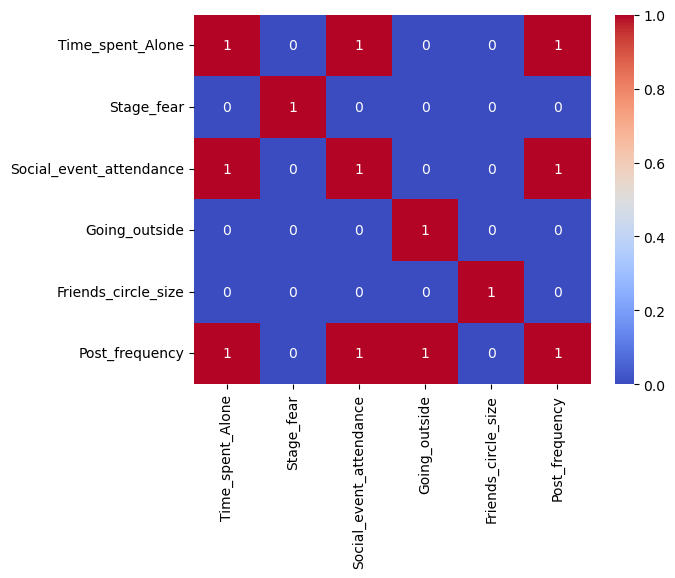

In [37]:
sns.heatmap(final_df,annot=True,cmap="coolwarm")